In [1]:
using Plots;
include("../AudioNMF.jl");
using .AudioNMF

In [2]:
## This many samples will result in a V matrix of size (256)x(2^18)
subrange = 1 : (156.5175 * (2^18))
filename = "../data/water.wav"
V, = audio_to_V(filename, subrange);

In [3]:
# k : number of components
# n : number of sequences

k_list = [16,32,64,128,256];
n_list = 2 .^[12,14,16,17,18]
compile_time = @elapsed W,H = nmf(zeros(10),2,1);
elapsed_time = zeros(length(k_list), length(n_list));

for (i_k, k) in enumerate(k_list), (i_n, n) in enumerate(n_list)
    elapsed_time[i_k,i_n] = @elapsed W, H = nmf(V[:,1:n],k,1000);
end

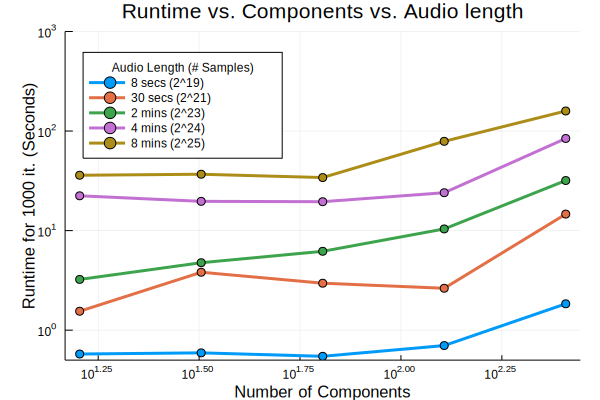

In [4]:
fig = plot(k_list, elapsed_time, markershape=:circle, xaxis=:log, yaxis=:log, legend=:topleft,
    label=["8 secs (2^19)","30 secs (2^21)","2 mins (2^23)","4 mins (2^24)","8 mins (2^25)"],lw=3,legend_title="Audio Length (# Samples)")
xlabel!(fig,"Number of Components")
ylabel!(fig,"Runtime for 1000 it. (Seconds)")
ylims!(fig,(0.5,1000))
title!(fig,"Runtime vs. Components vs. Audio length")

In [5]:
print("compile time: ", compile_time, "\n")
elapsed_time

compile time: 11.556650756


5×5 Array{Float64,2}:
 0.575797   1.54897   3.23315  22.3632   35.9724
 0.591552   3.81501   4.76006  19.6699   36.8282
 0.546099   2.96106   6.19653  19.5121   34.1021
 0.700483   2.63455  10.3958   24.019    78.8493
 1.83953   14.6491   31.8452   84.2144  159.065 